# 0.3.1 Sesgo vs varianza

In [3]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.3.1.1 Definición

Es una matriz que permite visualizar el desempeño de un clasificador. La organización típica es la presentada a continuación:

In [4]:
#
# Cálculo a partir de los valores reales y los pronósticos
#

y_true = [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
y_pred = [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


confusion_matrix(
    # -------------------------------------------------------------------------
    # Ground truth (correct) target values.
    y_true=y_true,
    # -------------------------------------------------------------------------
    # Estimated targets as returned by a classifier.
    y_pred=y_pred,
    # -------------------------------------------------------------------------
    # List of labels to index the matrix.
    labels=None,
    # -------------------------------------------------------------------------
    # Normalizes confusion matrix over the true (rows), predicted (columns)
    # conditions or all the population.
    # 'true', 'pred', 'all'
    normalize=None,
)

array([[10,  1],
       [ 3,  1]], dtype=int64)

## 0.3.1.2 Muestra de datos

## 0.3.1.3 Modelo de regresión

Por facilidad, se usará un polinomio de grado N para realizar la regresión:

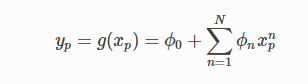

donde el subíndice p representa cada uno de los puntos de la muestra de datos.

## 0.3.1.4 Función de pérdida

En aprendizaje automático, el proceso de aprendizaje consiste en estimar los valores de los parámetros ϕn, para n=1,...,N que minimizan un error o pérdida. Una selección común es la sumatoria de errores al cuadrado:

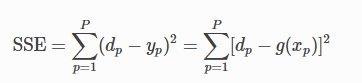

## 0.3.1.5 Ajuste del modelo a los datos disponibles

El concepto de aprendizaje se refiere a que el modelo realmente capture el comportamiento del proceso generador de los datos (no visible).

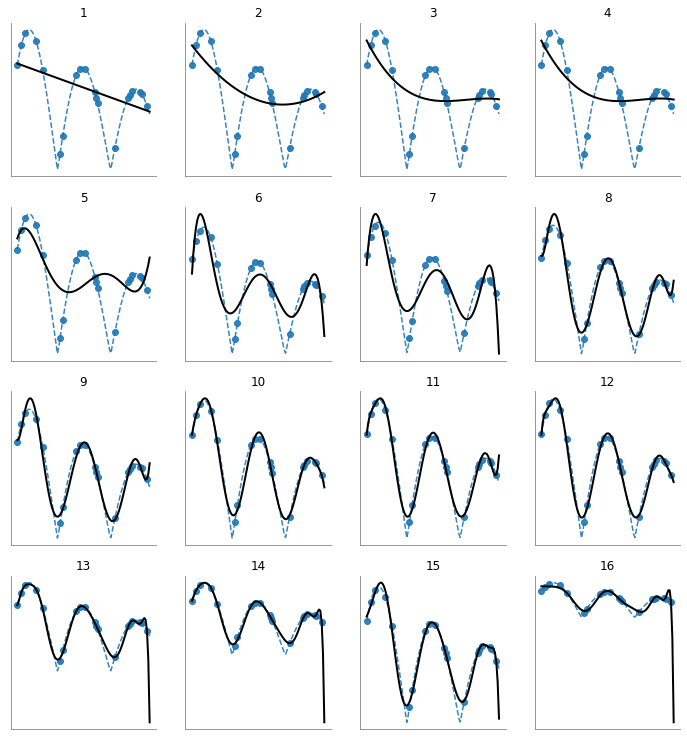

In [6]:
plt.figure(figsize=(12, 13))

degrees = list(range(1, 17))

for i_degree, degree in enumerate(degrees):

    plt.subplot(4, 4, i_degree + 1)

    #
    # Datos
    #
    plt.plot(x_real, y_real, "--", color="tab:blue", alpha=0.9)
    plt.plot(x_sample, y_sample, "o", color="tab:blue", alpha=0.9)

    #
    # Modelo
    #
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(),
    )
    model.fit(X_sample, y_sample)
    y_predicted = model.predict(x_real)

    plt.plot(
        x_real,
        y_predicted,
        color="black",
        linewidth=2,
    )
    plt.title(str(degree))
    plt.xticks([], [])
    plt.yticks([], [])

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)


plt.show()

- Subajuste: El modelo no reproduce adecuadamente el comportamiento de los datos usados para estimar sus parámetros, ni del comportamiento subyacente.

- Sobreajuste: El modelo empieza a memorizar los datos de entrenamiento; es decir, muy bajo error de ajuste entre puntos, pero oscila locamente entre punto y punto para los puntos de la muestra de entrenamiento.

- Ajuste óptimo: El modelo tiene un bajo error de ajuste y el comportamiento de la linea negra (modelo) es muy similar al comportamiento de la línea azul (real).

## 0.3.1.6 Dilema sesgo (bias) - varianza

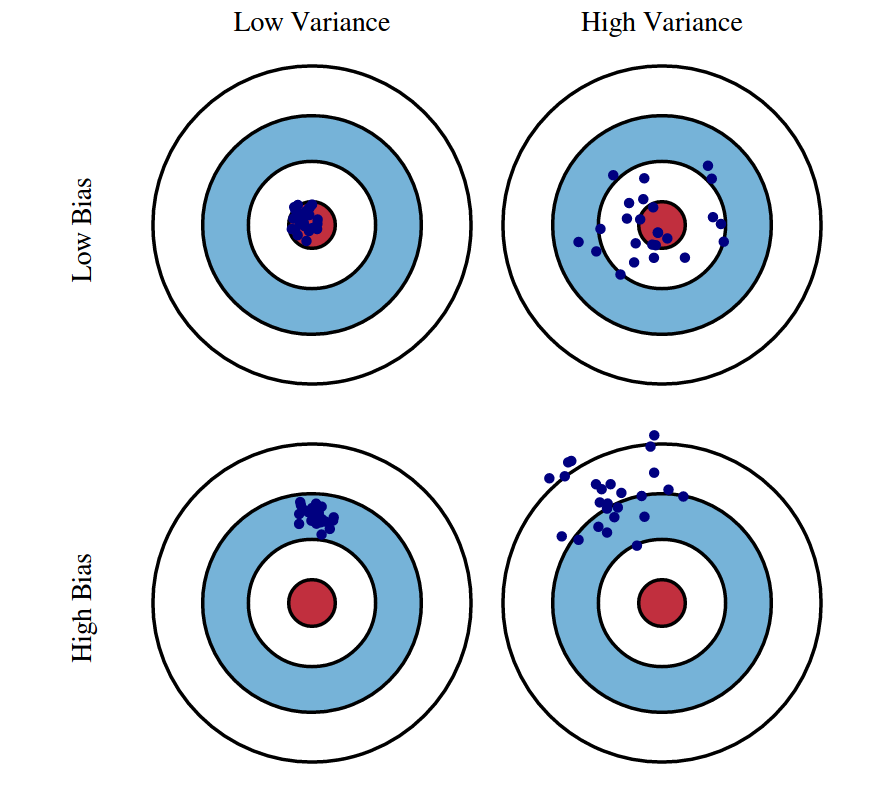

El término sesgo hace referencia a que tan bien se comporta el modelo para la muestra de datos disponible. En otras palabras, es el error promedio para diferentes muestras de entrenamiento.

El término varianza hace referencia a que tan bien se comporta el modelo para datos nuevos no disponibles hasta ahora (el modelo entra en productivo). En otras palabras, indica que tan sensitivos son los resultados obtenidos al variar el conjunto de entrenamiento.

El dilema sesgo - varianza se refiere que a medida que el modelo aumenta su ajuste a los datos de entrenamiento (disminuye el sesgo), existe un punto a partir del cual aumenta la variabilidad de sus resultados para datos nuevos (aumenta la varianza).

El dilema se presenta al querer disminuir simultáneamente el sesgo y la varianza.

En el gráfico anterior, a medida que aumenta la complejidad (el grado) del modelo, hay un mejor ajuste a los datos conocidos (muestra de entrenamiento), pero el modelo produce una salida muy volatil para puntos por fuera de la muestra (que aumenta con la complejidad del modelo).

## 0.3.1.7 Cómputo de los errores


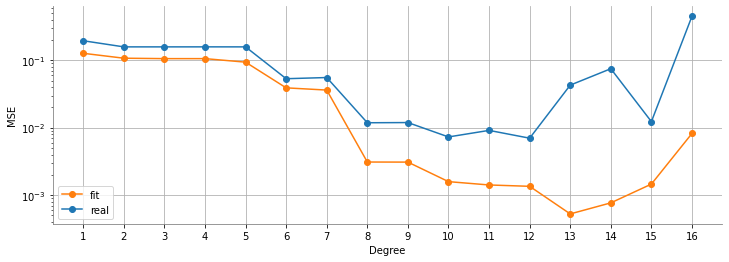

In [7]:
mse_fit = []
mse_real = []
degrees = list(range(1, 17))

for i_degree, degree in enumerate(degrees):

    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(),
    )
    model.fit(X_sample, y_sample)

    mse_fit.append(np.sum((y_sample - model.predict(X_sample)) ** 2) / len(y_sample))

    mse_real.append(np.sum((y_real.flatten() - model.predict(x_real)) ** 2) / len(y_real))


plt.figure(figsize=(12, 4))
plt.plot(range(1, len(degrees) + 1), mse_fit, "o-", color="tab:orange", label="fit")
plt.plot(range(1, len(degrees) + 1), mse_real, "o-", color="tab:blue", label="real")

plt.yscale("log")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(degrees)
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

Polimonio ideal para el profesor seria el 12, por parcimonia seria el 10, por diferencia el 6 o 7 que es donde el error entre el real y el ajustado no son tan diferentes.

In [8]:
print('ok_')

ok_
